In [9]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

import matplotlib.pyplot as plt

import edward as ed
from edward.models import Beta,Bernoulli
# DATA
x_data = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

# MODEL
p = Beta(1.0, 1.0)
x = Bernoulli(probs=p, sample_shape=10)

# INFERENCE
qp = Beta(tf.nn.softplus(tf.Variable(tf.random_normal([]))),
          tf.nn.softplus(tf.Variable(tf.random_normal([]))))

inference = ed.KLqp({p: qp}, data={x: x_data})
inference.run(n_iter=500)

# CRITICISM


500/500 [100%] ██████████████████████████████ Elapsed: 1s | Loss: 6.842


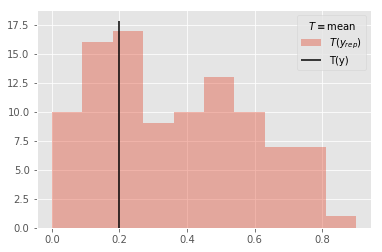

In [12]:
x_post = ed.copy(x, {p: qp})
y_rep, y = ed.ppc(
    lambda xs, zs: tf.reduce_mean(tf.cast(xs[x_post], tf.float32)),
    data={x_post: x_data})

ed.ppc_stat_hist_plot(
    y[0], y_rep, stat_name=r'$T \equiv$mean', bins=10)
plt.show()

In [16]:
y_rep

array([[ 1.50626614, -0.44559057,  0.65639493,  0.21059245, -1.38057304,
        -0.64625963,  1.60104288,  1.33715908,  1.99346591,  0.83999586,
         1.45755591, -1.15000045, -0.52706525, -1.24059022, -0.43144664,
        -1.01727891, -0.90039431,  1.64607208,  0.99981796,  0.95345244],
       [ 0.3489155 ,  1.30128231, -0.51416137,  2.30974559,  0.51929818,
        -1.25817274, -0.98324127,  1.42270099, -0.19762662, -0.32499924,
        -0.80494588, -0.20924648, -0.11364961,  1.40375708,  1.10842623,
        -0.31589467,  0.73542814, -0.67191026,  0.74999514,  1.3460633 ],
       [-0.35323325,  1.84093958, -0.51901692,  0.17588014, -0.69125751,
        -0.66097174, -1.05210147, -0.82810935,  1.38976034, -0.21205356,
        -0.22615222, -1.55844641, -0.42146724,  0.80776162,  0.60643248,
        -0.81130233, -0.60028771, -1.28497862,  1.41708064, -0.68206594],
       [-1.20632096, -0.28132726, -1.6488359 ,  1.07647846, -0.22949137,
        -0.13954864,  1.51041225, -1.13711502,  

In [17]:
y

array([ 1.27395785, -0.5640576 ,  0.55529065,  0.84083118, -0.60624561,
       -0.17140317,  0.70578407,  0.50379915, -0.08493867, -0.23216218,
       -0.40282426, -0.81913728,  0.70751964, -0.42456679,  0.71818844,
       -1.39691009, -0.58254285,  1.89192475,  1.16574603, -0.12346149])